In [2]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Import the CSV file 
ev = pd.read_csv('ElectricCarData_Clean.csv')
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [5]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
ev.shape
ev.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [8]:
ev.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

In [9]:
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

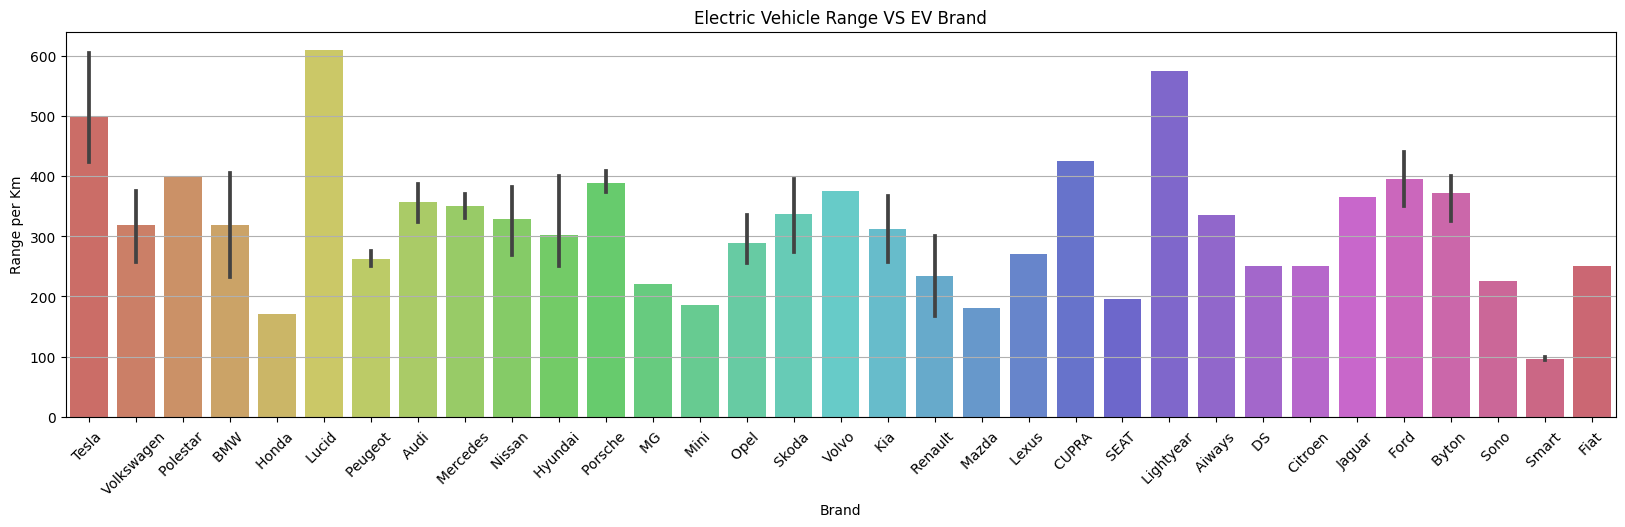

In [10]:
#Analysis range by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=ev,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

In [11]:
# model with highest range
range_df = ev.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

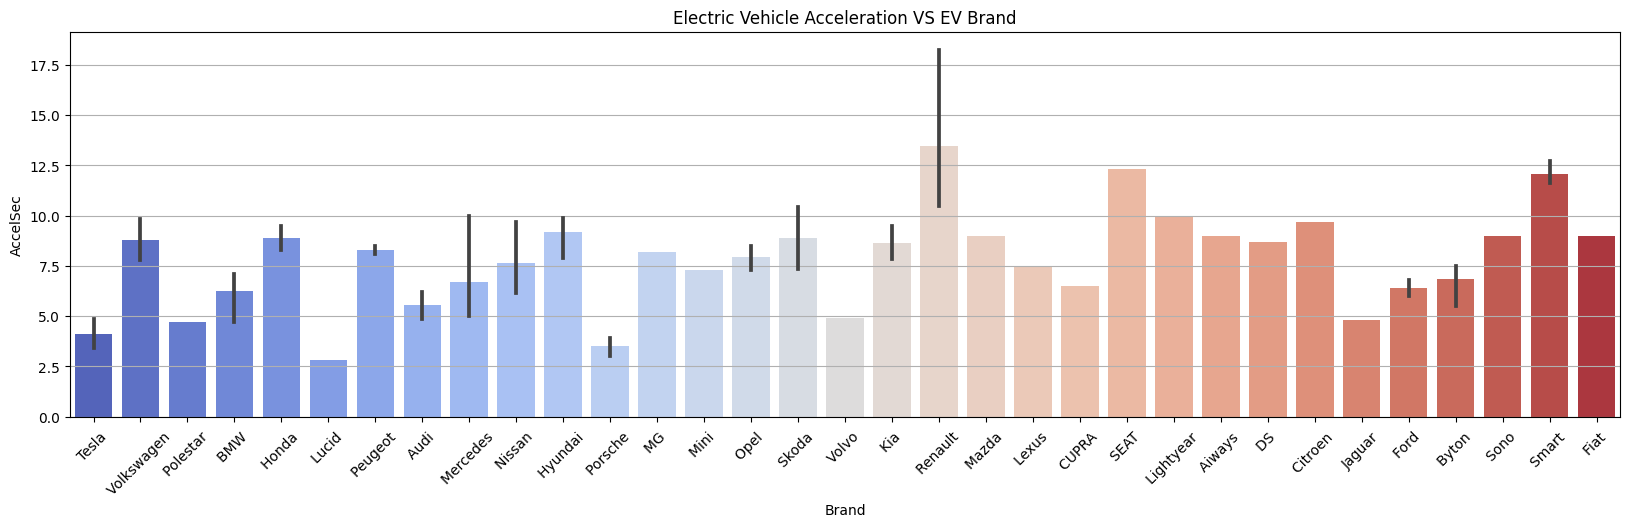

In [12]:
#Analysis acceleration by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=ev,palette='coolwarm')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

In [13]:
df = ev.sort_values(by=['AccelSec'], ascending=True)
df[['Brand','Model','AccelSec']].head(n=1)

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

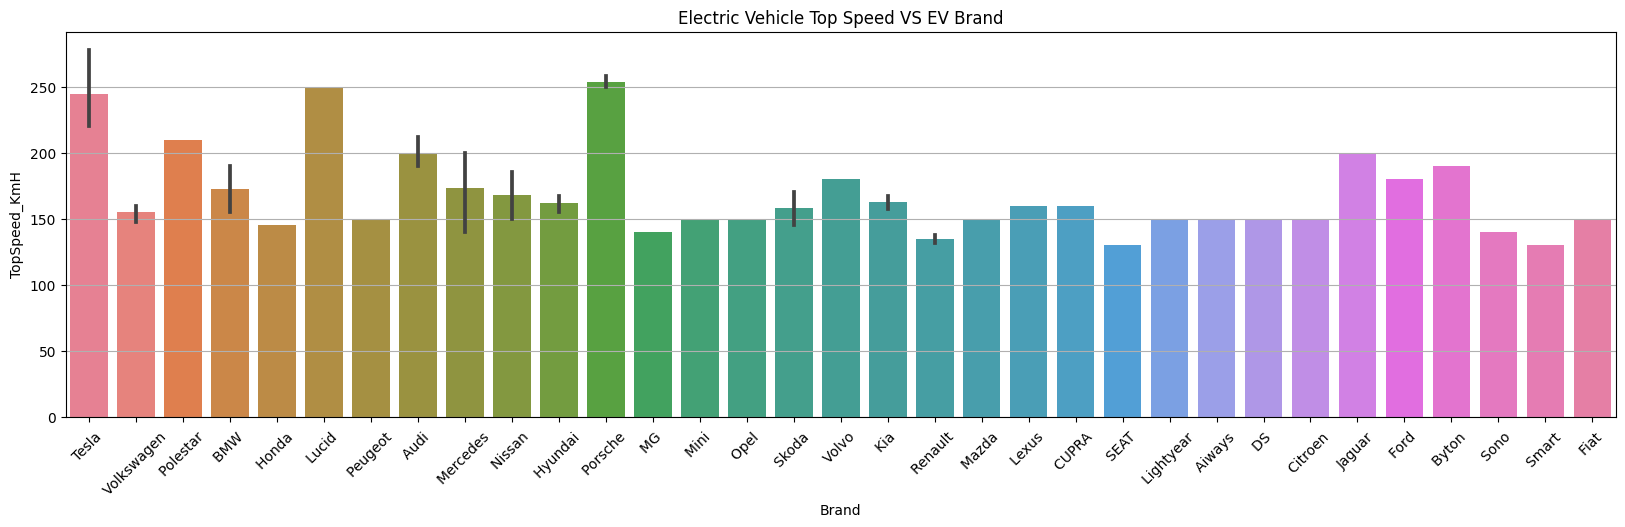

In [14]:
#Analysis top speed by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=ev,palette='husl')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

In [15]:
speed_df = ev.sort_values(by=['TopSpeed_KmH'], ascending=False)
speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

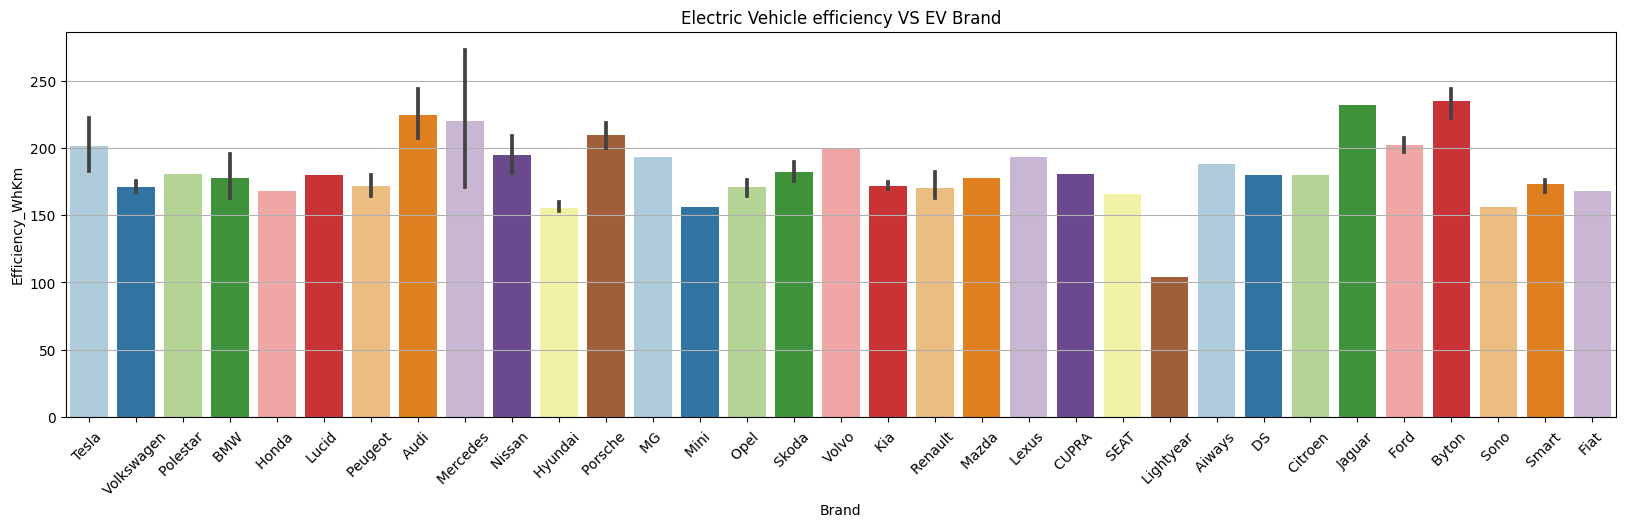

In [16]:
#Analysis efficiency by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=ev,palette='Paired')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

In [17]:
eff_df = ev.sort_values(by=['Efficiency_WhKm'], ascending=False)
eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


In [18]:
seat_df = ev.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
21,Tesla,Model Y Long Range Dual Motor,425,7


C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


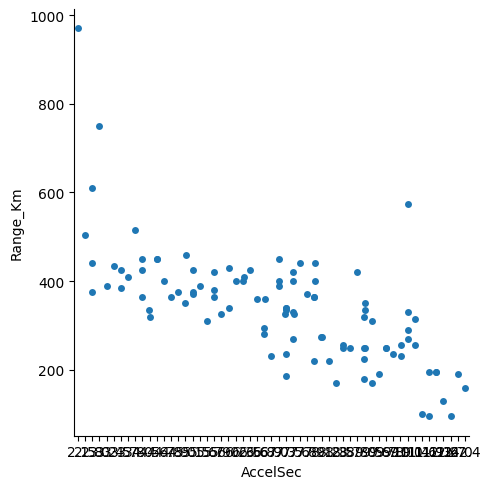

In [20]:
##Distribution of range with PowerTrain
fig, axs = plt.subplots(1,2)
sns.catplot(x="AccelSec", y="Range_Km", data=ev)
plt.close(1)

In [21]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [22]:
ev1 = ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [23]:
print(ev1)

encoder = OrdinalEncoder()

result = encoder.fit_transform(ev1)
print(result)

           Brand                            Model PowerTrain RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor        AWD         Yes   
1    Volkswagen                         ID.3 Pure        RWD         Yes   
2      Polestar                                 2        AWD         Yes   
3           BMW                              iX3         RWD         Yes   
4         Honda                                e         RWD         Yes   
..           ...                              ...        ...         ...   
98       Nissan                       Ariya 63kWh        FWD         Yes   
99         Audi     e-tron S Sportback 55 quattro        AWD         Yes   
100      Nissan               Ariya e-4ORCE 63kWh        AWD         Yes   
101      Nissan   Ariya e-4ORCE 87kWh Performance        AWD         Yes   
102       Byton                 M-Byte 95 kWh 2WD        AWD         Yes   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [24]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [25]:
ev.drop(temp,axis=1,inplace=True)
result = pd.DataFrame(result)

In [26]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [27]:
ev1 = ev
ev1.index+=1
ev1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
ev

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [28]:
import numpy as np

features = ['TopSpeed_KmH', 'AccelSec', 'Efficiency_WhKm', 'FastCharge_KmH']

for column in features:
    ev = ev[ev[column] != '-']

X = ev[['TopSpeed_KmH', 'AccelSec', 'Efficiency_WhKm', 'FastCharge_KmH']].values
y = ev['Range_Km']

In [30]:
#Training and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)

print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (78, 4)
X_test :  (20, 4)
y_train :  (78,)
y_test :  (20,)


In [31]:
# Create Linear Model
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([355.12774633, 459.001212  , 420.34657114, 257.3574734 ,
       283.94935408])

In [33]:
import joblib

joblib.dump(lr, r"C:\Users\kskor\OneDrive\Desktop\SHRUTI\Sem 6\EDI\linear_regression_model.pkl")

['C:\\Users\\kskor\\OneDrive\\Desktop\\SHRUTI\\Sem 6\\EDI\\linear_regression_model.pkl']

In [34]:
loaded_lr_model = joblib.load('linear_regression_model.pkl')

In [35]:
#real - time data
import joblib

lr_model = joblib.load(r"C:\Users\kskor\OneDrive\Desktop\SHRUTI\Sem 6\EDI\linear_regression_model.pkl")

top_speed = 160
acceleration = 15.0
efficiency = 100
fast_charge = 250

real_time_features = np.array([[top_speed, acceleration, efficiency, fast_charge]])

predicted_range = lr_model.predict(real_time_features)
print(predicted_range)

[283.78266187]


In [64]:
#Predict the range of this EV using linear regression model.

import joblib

lr = joblib.load(r"C:\Users\kskor\OneDrive\Desktop\SHRUTI\Sem 6\EDI\linear_regression_model.pkl")

import numpy as np

top_speed = 160
acceleration = 7.3
efficiency = 171
fast_charge = 470

features = np.array([[top_speed, acceleration, efficiency, fast_charge]])

predicted_range = lr.predict(features)

print("Predicted Range (Km):", predicted_range[0])

Predicted Range (Km): 324.70139596922695


In [66]:
total_capacity_kwh = float(input("Enter the total capacity of the battery pack in kilowatt-hours (KWh): "))
efficiency_wh_km = float(input("Enter the efficiency of the battery pack in percentage (WhKm): "))
consumed_energy = efficiency_wh_km * predicted_range / 1000  # Convert to KWh

# Calculate SoC
current_soc = 100 - (consumed_energy / total_capacity_kwh) * 100
print(f"Estimated State of Charge (SoC): {current_soc[0]:.2f}%")

Enter the total capacity of the battery pack in kilowatt-hours (KWh):  62
Enter the efficiency of the battery pack in percentage (WhKm):  171


Estimated State of Charge (SoC): 10.45%


In [74]:
def calculate_range_from_soc(total_capacity_kwh, soc, efficiency_wh_km):
    available_energy_kwh = (soc / 100) * total_capacity_kwh
    predicted_range = available_energy_kwh * 1000 / efficiency_wh_km
    return predicted_range

# Prompt the user for input
total_capacity_kwh = float(input("Enter the total capacity of the battery pack in kilowatt-hours (kWh): "))
soc = float(input("Enter the current State of Charge (SoC) in percentage (%): "))
efficiency_wh_km = float(input("Enter the efficiency of the battery pack in Wh/km: "))

# Calculate available energy
available_energy_kwh = (soc / 100) * total_capacity_kwh
print(f"Available energy: {available_energy_kwh:.2f} kWh")

# Calculate and print the estimated range
estimated_range = calculate_range_from_soc(total_capacity_kwh, soc, efficiency_wh_km)
print(f"Estimated Range: {estimated_range:.2f} km")

Enter the total capacity of the battery pack in kilowatt-hours (kWh):  62
Enter the current State of Charge (SoC) in percentage (%):  10.45
Enter the efficiency of the battery pack in Wh/km:  171


Available energy: 6.48 kWh
Estimated Range: 37.89 km


In [58]:
def charging_discharging_decision(predicted_range, current_soc, min_soc_threshold, max_soc_threshold):
    """
    Make a decision whether to charge, discharge, or maintain the current state based on predicted range and current SoC.
    """
    if current_soc <= min_soc_threshold:
        decision = 'battery is discharged'
    else: 
        decision = 'Battery has enough Charging. You are good to go!'
    return decision

predicted_range  
current_soc     
min_soc_threshold = 20
max_soc_threshold = 80

decision = charging_discharging_decision(predicted_range, current_soc, min_soc_threshold, max_soc_threshold)
print("Charging/Discharging Decision: ", decision)

Charging/Discharging Decision:  Battery has enough Charging. You are good to go!


In [59]:
import numpy as np

def regenerative_braking(current_speed, deceleration_rate, efficiency_wh_km):
    recovered_energy = 0.5 * (current_speed ** 2) / deceleration_rate * efficiency_wh_km / 1000  # Convert to KWh
    return recovered_energy

lr = joblib.load(r"C:\Users\kskor\OneDrive\Desktop\SHRUTI\Sem 6\EDI\linear_regression_model.pkl")

top_speed = 170
acceleration = 20
efficiency = 150
fast_charge = 270

features = np.array([[top_speed, acceleration, efficiency, fast_charge]])

predicted_range = lr.predict(features)

print("Predicted Range (Km):", predicted_range[0])

total_capacity_kwh = float(input("Enter the total capacity of the battery pack in kilowatt-hours (KWh): "))
efficiency_wh_km 
consumed_energy = efficiency_wh_km * predicted_range / 1000  # Convert to KWh

# Calculate SoC
current_soc = 100 - (consumed_energy / total_capacity_kwh) * 100
print(f"Estimated State of Charge (SoC): {current_soc[0]:.2f}%")

# Example values for regenerative braking
current_speed = 40 
deceleration_rate = 2

recovered_energy = regenerative_braking(current_speed, deceleration_rate, efficiency_wh_km)
print(f"Recovered Energy from Regenerative Breaking: {recovered_energy:.2f} KWh")

current_soc += 100 - (recovered_energy / total_capacity_kwh) * 100

print(f"Estimated State of Charge (SoC) after regenerative breaking: {current_soc[0]:.2f}%")

max_soc_threshold = 80 
if current_soc > max_soc_threshold:
    current_soc = max_soc_threshold

min_soc_threshold = 20  
if current_soc < min_soc_threshold:
    current_soc = min_soc_threshold

adjusted_decision = charging_discharging_decision(predicted_range, current_soc, min_soc_threshold, max_soc_threshold)
print("Charging/Discharging Decision after Regenerative Breaking:", adjusted_decision)

Predicted Range (Km): 331.97635235760805


Enter the total capacity of the battery pack in kilowatt-hours (KWh):  170


Estimated State of Charge (SoC): 70.71%
Recovered Energy from Regenerative Breaking: 60.00 KWh
Estimated State of Charge (SoC) after regenerative breaking: 135.41%
Charging/Discharging Decision after Regenerative Breaking: Battery has enough Charging. You are good to go!


In [40]:
# Get the coefficients
coefficients = lr.coef_

# Print the coefficients for each feature
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

[170  20 150 270]: 1.3634684666056547


In [41]:
lr.coef_

array([1.36346847, 3.54887784, 0.24366532, 0.23156753])

In [42]:
lr.intercept_

-69.86387402319036

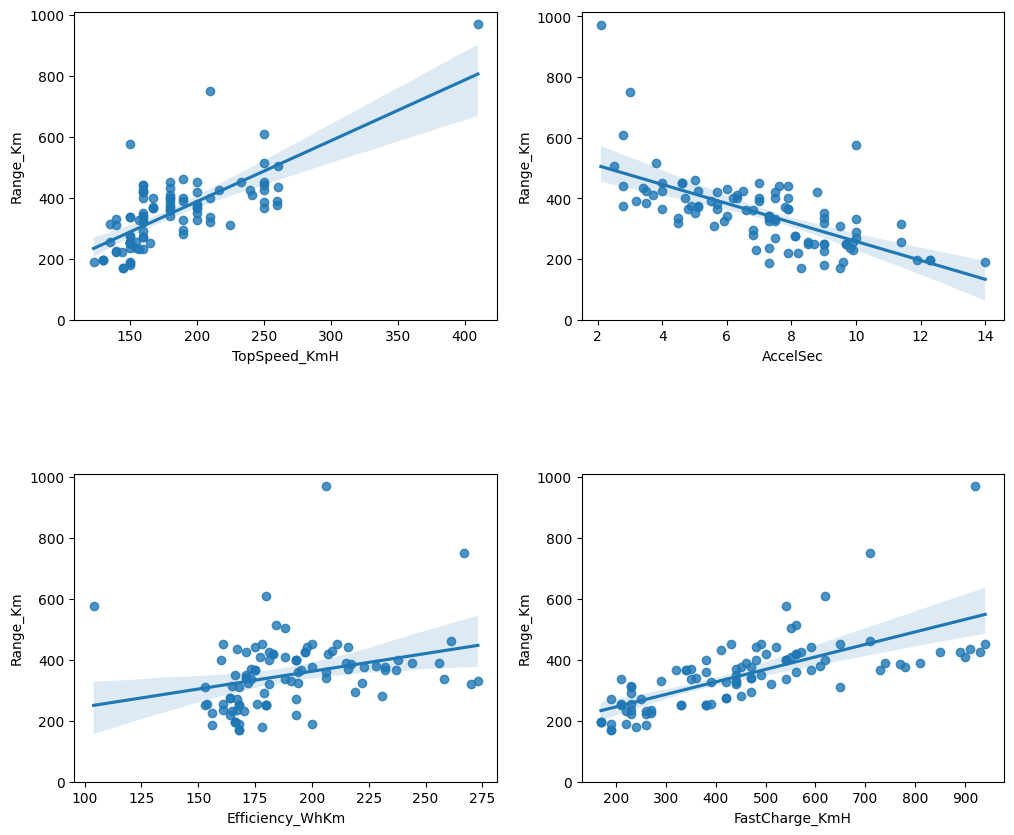

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure your DataFrame 'ev' is defined and contains the necessary columns
# Check and convert data types
features = ["TopSpeed_KmH", "AccelSec", "Efficiency_WhKm", "FastCharge_KmH", "Range_Km"]
ev[features] = ev[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or NaN values in the specified columns
ev = ev.dropna(subset=features)

# Define the number of subplots and their layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Create scatter plots with regression lines for each feature
for i, feature in enumerate(features[:-1]):  # Exclude the target variable "Range_Km"
    row, col = divmod(i, 2)
    sns.regplot(x=feature, y="Range_Km", data=ev, ax=axes[row, col])
    axes[row, col].set_ylim(0)

# Show the plot
plt.show()

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have imported and prepared your dataset
# ev = pd.read_csv('your_dataset.csv')

# Check the data types of the columns in your DataFrame
print(ev.dtypes)

AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH       int64
Seats                int64
PriceEuro            int64
Brand              float64
Model              float64
PowerTrain         float64
RapidCharge        float64
PlugType           float64
BodyStyle          float64
Segment            float64
dtype: object


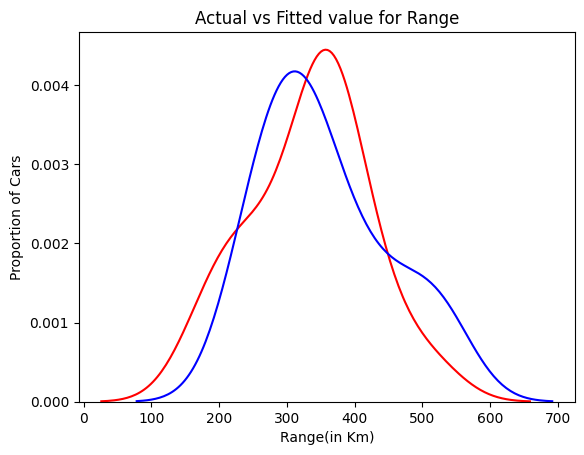

In [48]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

In [49]:
#Model Evaluation (Regression Metrics)
# Calculate the score for Training Data
lr.score(X_train, y_train)
print("R2 for Traing Data: ", lr.score(X_train, y_train))

R2 for Traing Data:  0.5861633867646734


In [50]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.4576105741538946


In [51]:
#Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  3941.0015681978016


In [52]:
#Calculate Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  51.6450531526145


In [53]:
#Calculate Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  62.77739695302603


In [ ]:
def calculate_required_speed(distance, efficiency_wh_km):
    """
    Calculate the required speed (in km/h) to cover a given distance
    based on the efficiency of the battery pack.

    Args:
        distance (float): Distance to travel in kilometers.
        efficiency_wh_km (float): Efficiency of the battery pack in Watt-hours per kilometer (Wh/km).

    Returns:
        float: Required speed in kilometers per hour.
    """
    # Convert efficiency from Wh/km to kWh/100km
    efficiency_kwh_100km = efficiency_wh_km / 10

    # Calculate the energy required for the distance
    energy_required_kwh = (distance / 100) * efficiency_kwh_100km

    # Assume you have the full battery capacity available
    total_capacity_kwh = float(input("Enter the total capacity of the battery pack in kilowatt-hours (kWh): "))

    # Calculate the time required to consume the required energy
    time_required_hours = energy_required_kwh / total_capacity_kwh

    # Calculate the required speed
    required_speed_kmh = distance / time_required_hours

    return required_speed_kmh

# Prompt the user for input
efficiency_wh_km = float(input("Enter the efficiency of the battery pack in Wh/km: "))
distance_to_travel = float(input("Enter the distance you want to travel (in km): "))

# Calculate the required speed
required_speed_kmh = calculate_required_speed(distance_to_travel, efficiency_wh_km)

print(f"To cover a distance of {distance_to_travel} km, you should travel at {required_speed_kmh:.2f} km/h.")